## Advanced Lane Finding Project

The goals / steps of this camera_calibration project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.


---
## First, I'll compute the camera calibration using chessboard images

## And so on and so forth...

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibra*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

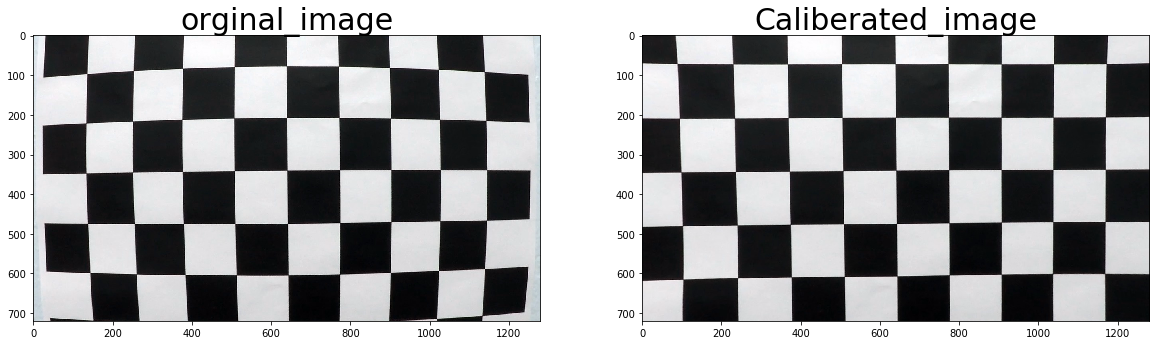

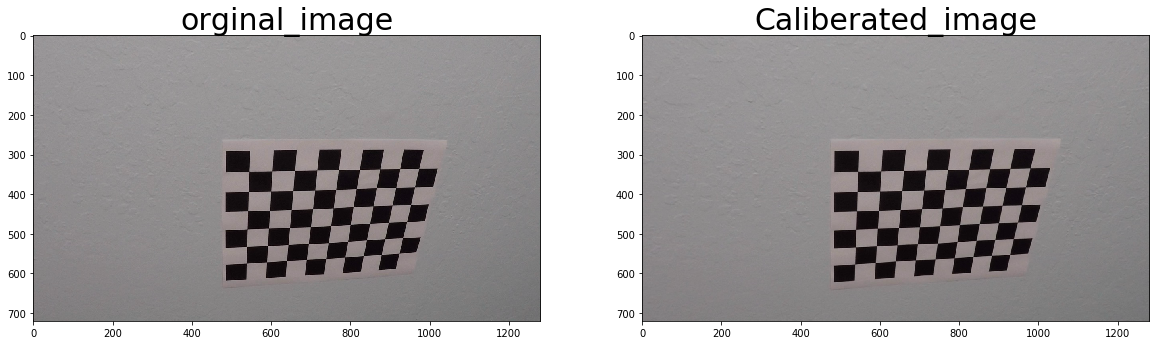

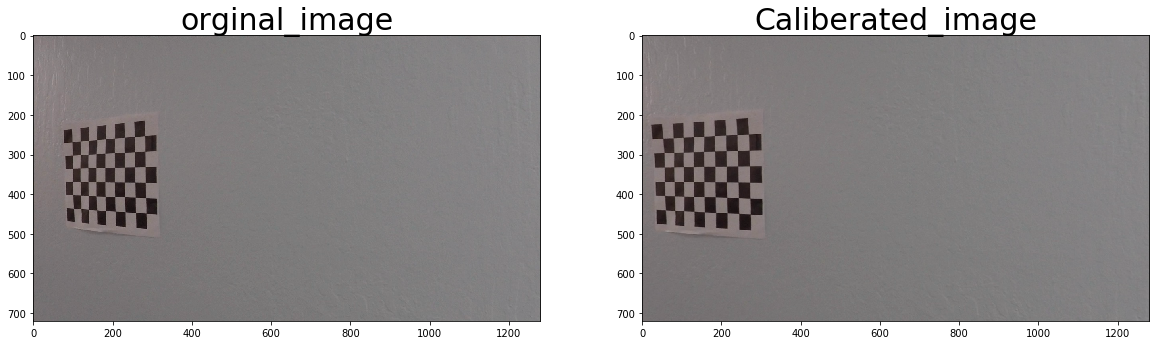

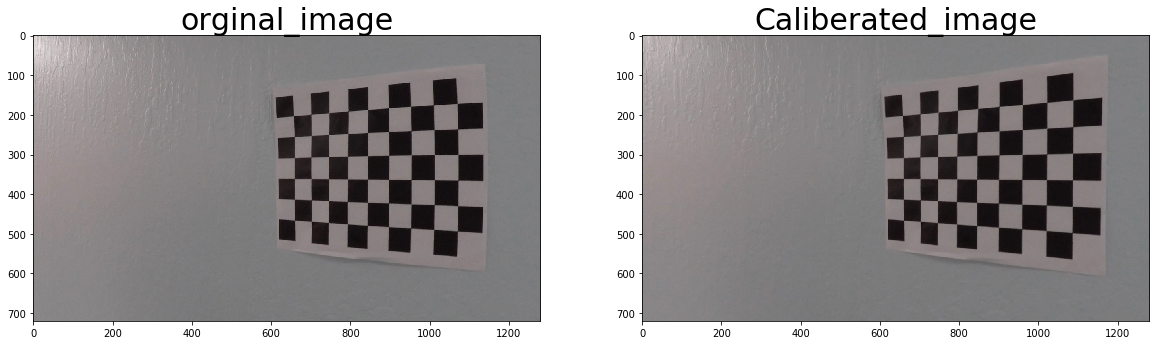

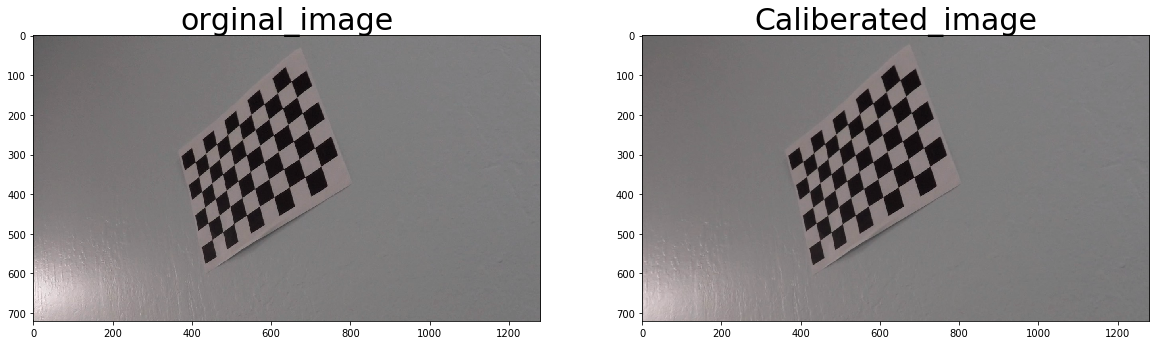

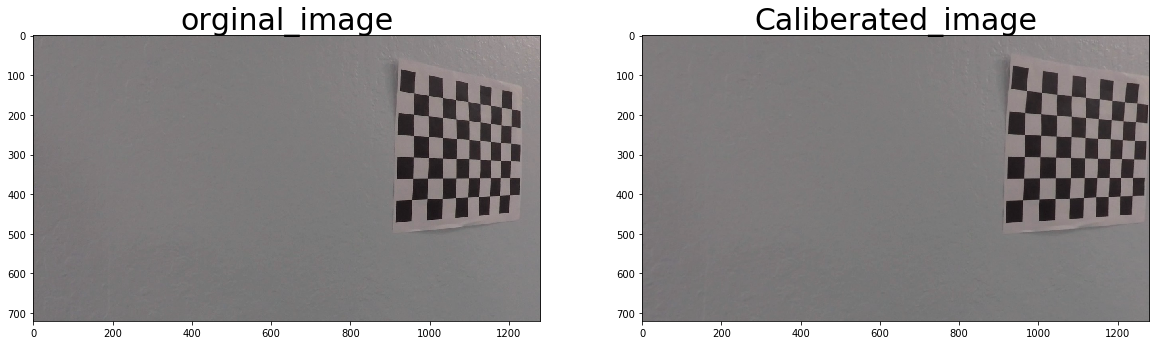

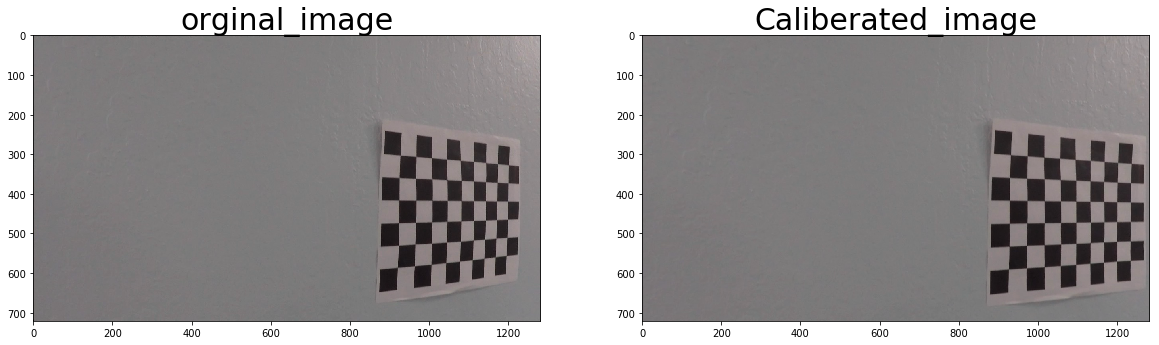

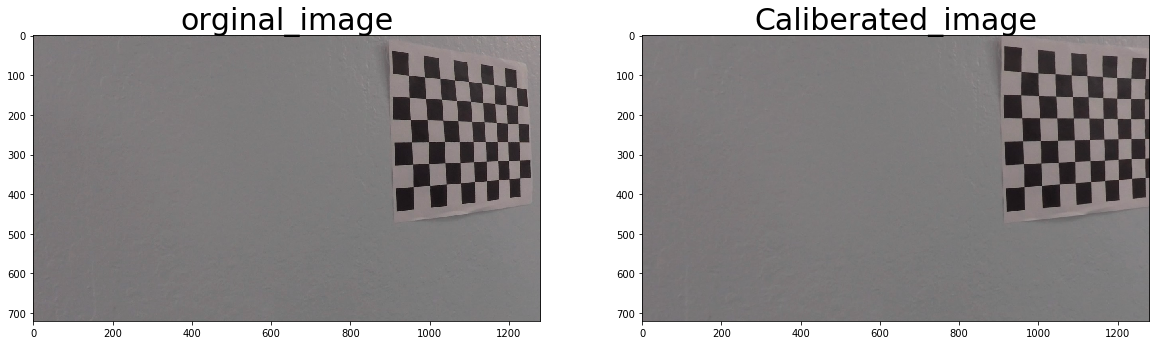

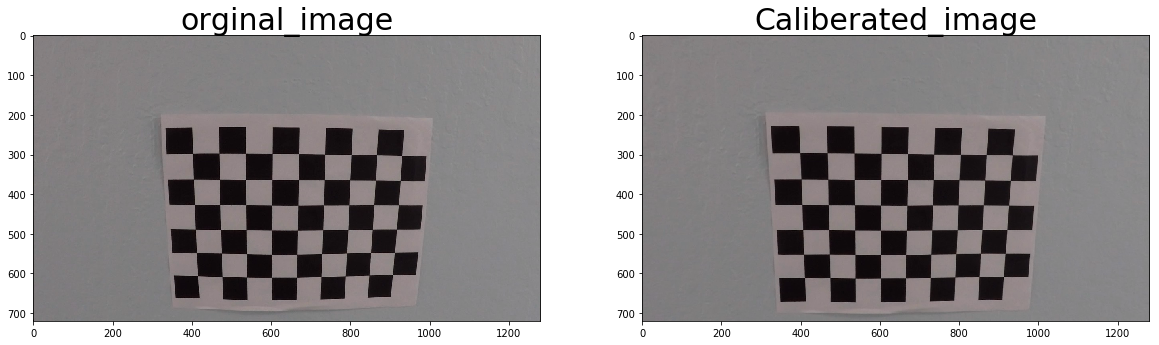

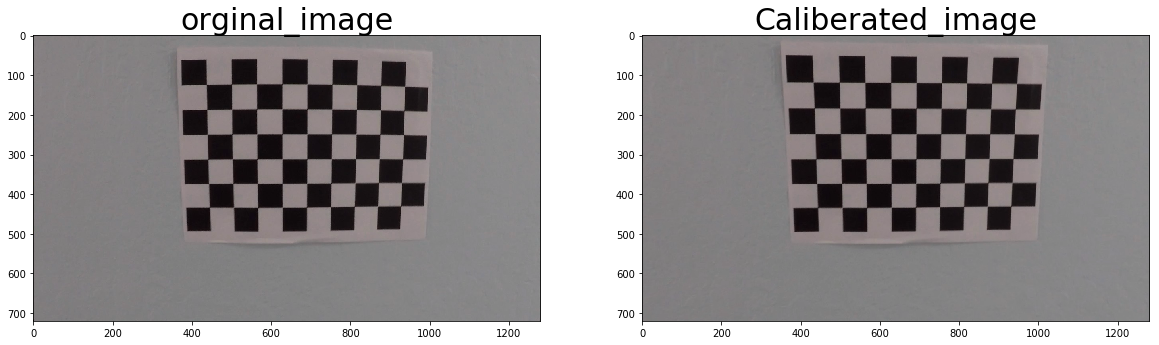

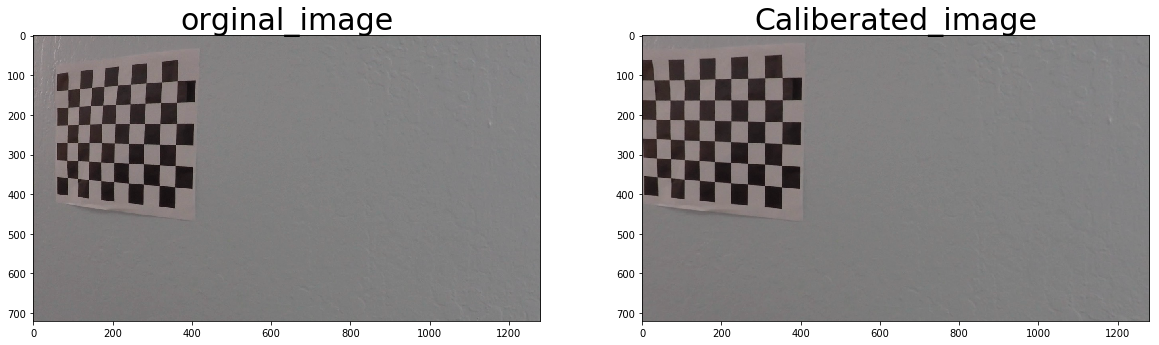

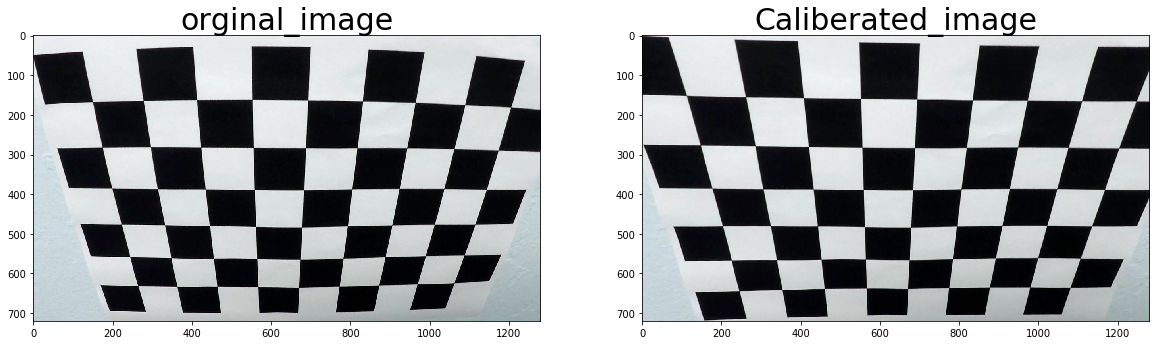

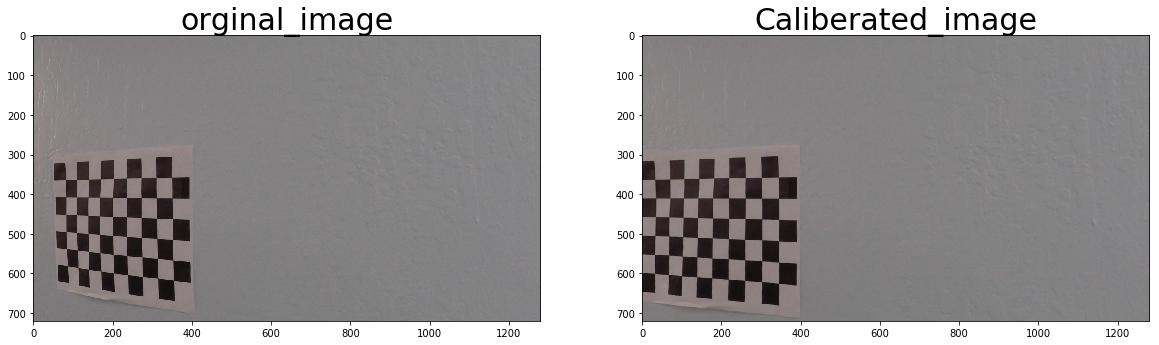

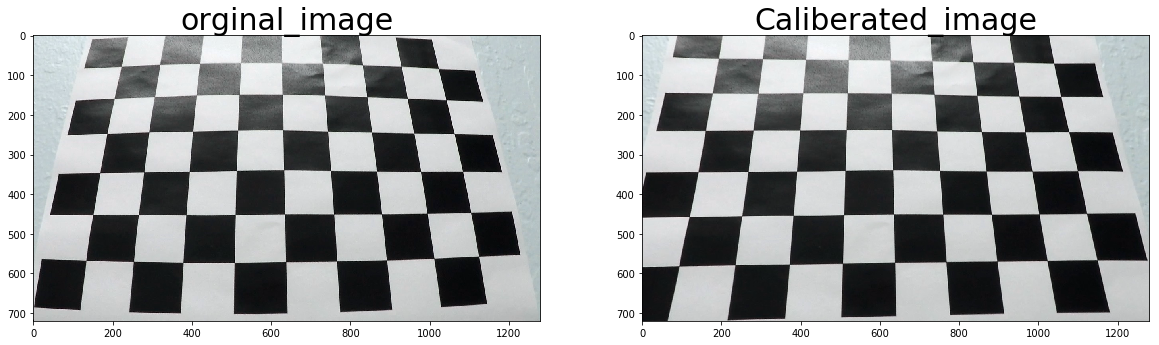

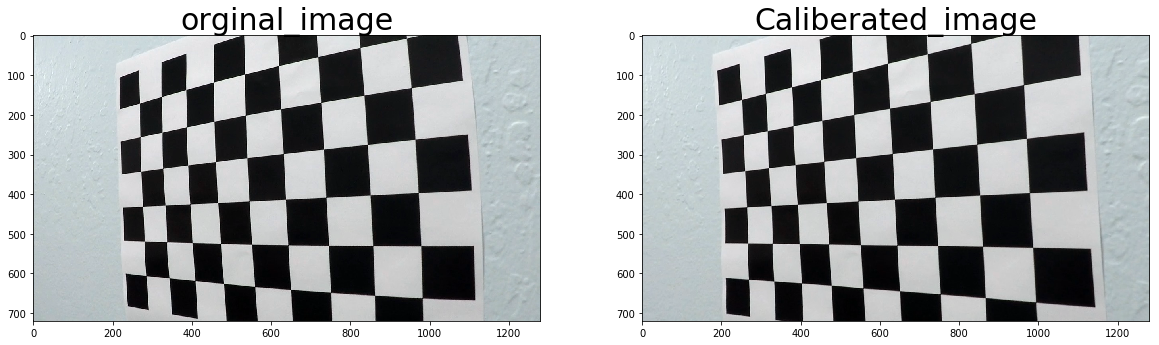

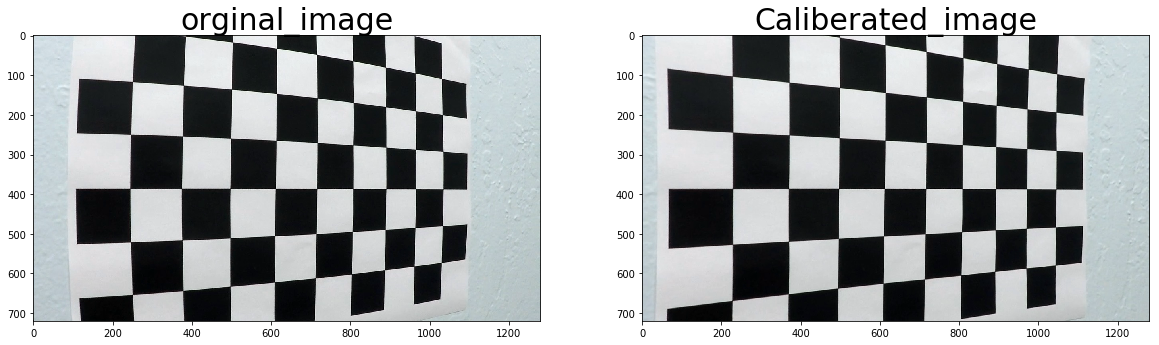

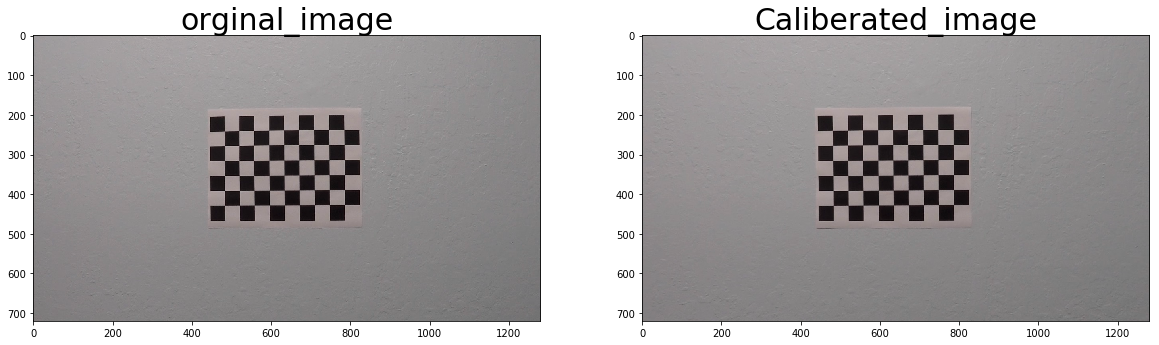

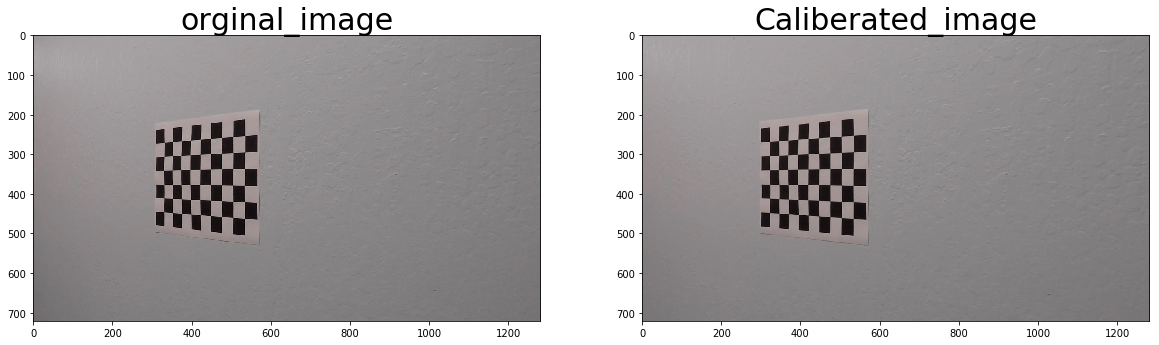

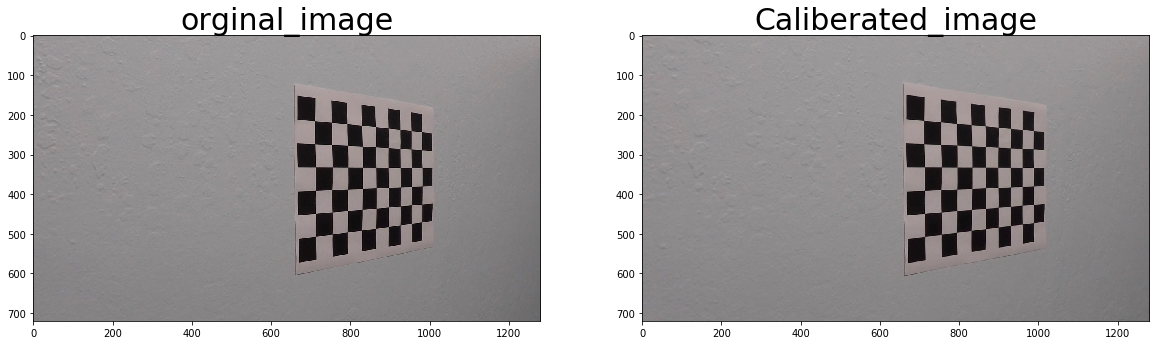

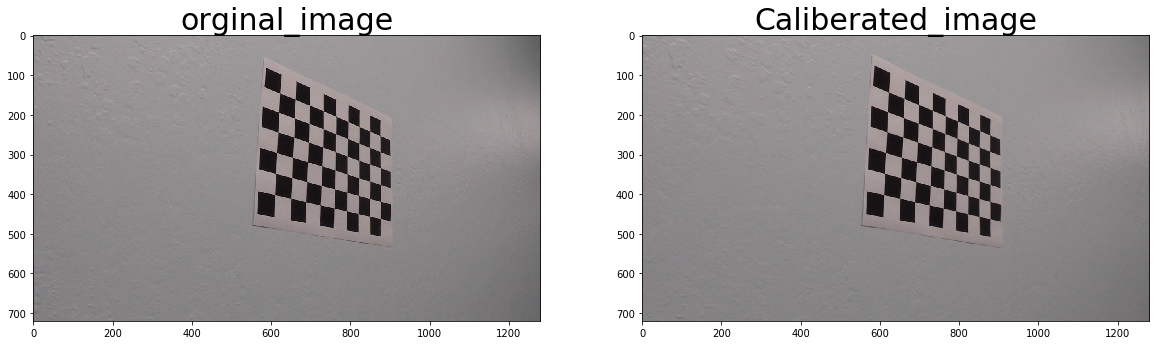

In [9]:
import pickle
import os
import matplotlib.image as mpimg
%matplotlib inline

# Test undistortion on an image

images = glob.glob('camera_cal/calibra*.jpg')

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    
    #  calibrated camera images by generated corners
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    
    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "output_images/wide_dist_pickle.p", "wb" ) )
    
    #undistort 
    dst = cv2.undistort(img, mtx, dist, None, mtx)    
    write_name = 'calibration'+str(i)+'.jpg'
    cv2.imwrite('output_images/'+write_name, dst)    
    
    
    # Add Display plot
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    
    # Visualize undistorted, calibetated images
    ax1.imshow(img)
    ax1.set_title("orginal_image", fontsize=20)
    ax2.imshow(dst)
    ax2.set_title("Caliberated_image", fontsize=20)
    
def corners_unwarp(img, nx, ny, mtx, dist):
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]]
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset],[img_size[0]-offset, img_size[1]-offset],[offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist, M, img_size)
    return warped, M
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)



    
    
    














